In [1]:
# import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
import joblib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mfcc.csv file contains all the feature matrix for all the auido signals
df = pd.read_csv("mfcc.csv", index_col = 0)
df.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,fname,label
0,-594.02905,38.685047,5.528638,5.631155,3.402866,1.321781,-0.979730,-2.110061,-3.675011,-1.318223,...,0.574885,0.314081,0.139944,0.104879,0.105029,0.277018,-0.065550,0.118038,set_a/artifact__201012172012.wav,artifact
1,-750.83350,29.685860,-4.507759,-2.470311,-4.913468,-1.428128,-1.864767,0.225090,-4.211214,0.175512,...,-0.793682,1.592819,-0.751207,1.241795,-1.067852,1.084590,-0.780088,1.135242,set_a/artifact__201105040918.wav,artifact
2,-559.36220,35.351220,-13.119020,-3.854263,-10.170296,-2.961954,-8.500693,0.070704,-6.701177,-0.199900,...,-1.632973,2.054471,-1.348332,1.888599,-1.276106,1.303232,-0.784756,1.153624,set_a/artifact__201105041959.wav,artifact
3,-293.34302,103.457886,-13.003966,19.647190,-14.164202,-3.886931,-15.286445,-4.694386,-8.967902,-7.757905,...,0.853834,3.688840,0.803865,2.527869,-0.573466,1.877491,-1.014469,1.853802,set_a/artifact__201105051017.wav,artifact
4,-291.52417,95.693240,-11.997632,8.995483,-4.294098,2.263997,-8.406081,-6.354175,-8.621305,-3.386567,...,-0.222854,2.129115,-0.277558,1.836322,0.245034,2.129474,-0.898521,0.876153,set_a/artifact__201105060108.wav,artifact


In [3]:
from sklearn.model_selection import train_test_split

# X contains the features, y contains the labels
X = df.drop(columns=['label', 'fname'])  # Drop the column containing labels
y = df['label']  # Select the column containing labels

# Perform train-test split
X__train, X_test, y__train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X__train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 106 to 354
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mfcc0   468 non-null    float64
 1   mfcc1   468 non-null    float64
 2   mfcc2   468 non-null    float64
 3   mfcc3   468 non-null    float64
 4   mfcc4   468 non-null    float64
 5   mfcc5   468 non-null    float64
 6   mfcc6   468 non-null    float64
 7   mfcc7   468 non-null    float64
 8   mfcc8   468 non-null    float64
 9   mfcc9   468 non-null    float64
 10  mfcc10  468 non-null    float64
 11  mfcc11  468 non-null    float64
 12  mfcc12  468 non-null    float64
 13  mfcc13  468 non-null    float64
 14  mfcc14  468 non-null    float64
 15  mfcc15  468 non-null    float64
 16  mfcc16  468 non-null    float64
 17  mfcc17  468 non-null    float64
 18  mfcc18  468 non-null    float64
 19  mfcc19  468 non-null    float64
 20  mfcc20  468 non-null    float64
 21  mfcc21  468 non-null    float64
 22  

In [4]:
y__train.unique(), y_test.unique()

(array(['normal', 'murmur', 'artifact', 'extrastole', 'extrahls'],
       dtype=object),
 array(['murmur', 'normal', 'artifact', 'extrahls', 'extrastole'],
       dtype=object))

In [5]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X__train, y__train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mfcc0   1405 non-null   float64
 1   mfcc1   1405 non-null   float64
 2   mfcc2   1405 non-null   float64
 3   mfcc3   1405 non-null   float64
 4   mfcc4   1405 non-null   float64
 5   mfcc5   1405 non-null   float64
 6   mfcc6   1405 non-null   float64
 7   mfcc7   1405 non-null   float64
 8   mfcc8   1405 non-null   float64
 9   mfcc9   1405 non-null   float64
 10  mfcc10  1405 non-null   float64
 11  mfcc11  1405 non-null   float64
 12  mfcc12  1405 non-null   float64
 13  mfcc13  1405 non-null   float64
 14  mfcc14  1405 non-null   float64
 15  mfcc15  1405 non-null   float64
 16  mfcc16  1405 non-null   float64
 17  mfcc17  1405 non-null   float64
 18  mfcc18  1405 non-null   float64
 19  mfcc19  1405 non-null   float64
 20  mfcc20  1405 non-null   float64
 21  mfcc21  1405 non-null   float64
 22  

# Scaler used for cloud deplyment
cols = ["mfcc"+str(i) for i in range(0, 10)]
scaler = StandardScaler()
scaler.fit(X_train[cols])
joblib.dump(scaler, 'scaler.joblib')

In [6]:
# using Standard scaled to normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [7]:
# best_features functions identifies all the columns with most impact on th emodel predictions
def best_features(X, y, k, scoring = accuracy_score):
    
    best_set = []
    
    # checl_best functions rens a knn model iteratively by add each column one at a time
    def check_best(X, y, k, best_score = 0, include = []):
        knn = KNeighborsClassifier(n_neighbors=k)
        feature_sets = [item for item in list(X.columns) if item not in include]

        for features in feature_sets:
            X_subsetb = (X[[features]+include])
            X_train, X_valid, y_train, y_valid = train_test_split(X_subsetb, y,
                                                                  test_size=0.25,
                                                                  random_state=42)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_valid)
            P = scoring(y_valid, y_pred)
        
            if P > best_score:
                best_set.insert(0, check_best(X, y, k, best_score = P, include = include+[features]))
                return features
            
    check_best(X, y, k)
    best_set = [x for x in best_set if x is not None]
    
    return best_set

# function identifies the best k value to use to obtain best accuracy
def optimal_K_scores(X, y, k_range = range(2, 5), scoring = accuracy_score):

    optimal_scores = pd.DataFrame()
    
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors=i)
        Bfeatures = best_features(X, y, i, scoring = scoring)
        
        XB_subset = X[Bfeatures]
        XB_train, XB_valid, yB_train, yB_valid = train_test_split(XB_subset, y, test_size=0.25, random_state=42)
        knn.fit(XB_train, yB_train)
        yB_pred = knn.predict(XB_valid)
        P = scoring(yB_valid, yB_pred)

        optimal_scores.at[i, "score"] = P
        optimal_scores.at[i, "features"] = ', '.join(Bfeatures)
        
    print("Optimal k is "+str(optimal_scores["score"].idxmax())+" with "+str(optimal_scores["score"].max()))
    
    return optimal_scores

In [8]:
K_scores = optimal_K_scores(X_train, y_train, k_range = range(2, 20), scoring = accuracy_score)
K_scores

Optimal k is 5 with 0.8778409090909091


,score,features
2,0.875000,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc12, mfcc5, mfcc9"
3,0.863636,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc13"
4,0.849432,"mfcc1, mfcc2, mfcc3, mfcc8, mfcc10"
5,0.877841,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc8, mfcc14, mfc..."
6,0.852273,"mfcc1, mfcc2, mfcc3, mfcc5, mfcc12, mfcc14, mf..."
7,0.852273,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc8, mfcc..."
8,0.832386,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc16, mfc..."
9,0.812500,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc12, mfcc7"
10,0.835227,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc8, mfcc..."
11,0.855114,"mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc8, mfcc9"


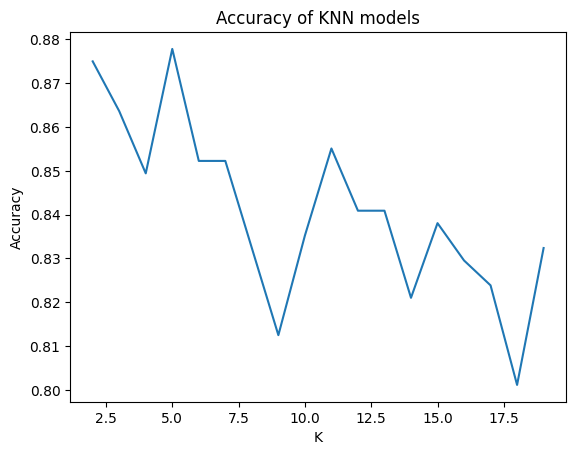

In [22]:
# Plot the accuracies
plt.plot(range(2, 20), K_scores['score'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.show();

In [9]:
# We can see that k=5 has the best cross validation accuracy
print(K_scores["features"].iloc[5])

mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc8, mfcc9, mfcc6, mfcc22, mfcc43


In [10]:
P_list = []

# iterate knn by adding 1 column at a time to identify how the acuuracy changes
for k in range(1, len(X_train.columns)+1):
    
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X_train, y_train)
    Bfeatures = []
    
    for i in selector.get_support(indices=True):
        Bfeatures.append(list(X_train.columns)[i])
    
    knn = KNeighborsClassifier(n_neighbors=5)
    XB_subset = X_train[Bfeatures]
    XB_train, XB_valid, yB_train, yB_valid = train_test_split(XB_subset, y_train, test_size=0.25, random_state=42)
    knn.fit(XB_train, yB_train)
    yB_pred = knn.predict(XB_valid)
    
    P = round(accuracy_score(yB_valid, yB_pred)*100, 2)
    P_list.append(P)
    
    print(P, k)

63.35 1
74.72 2
80.68 3
83.52 4
83.52 5
82.95 6
82.95 7
83.52 8
86.36 9
82.1 10
83.81 11
84.09 12
84.94 13
83.81 14
84.09 15
83.52 16
84.38 17
84.38 18
84.66 19
84.94 20
84.09 21
83.24 22
84.66 23
84.09 24
84.38 25
83.52 26
83.81 27
84.94 28
85.51 29
85.51 30
85.23 31
85.23 32
85.23 33
85.23 34
84.94 35
84.66 36
84.66 37
85.23 38
84.66 39
84.94 40
84.66 41
84.66 42
85.51 43
85.51 44
85.51 45
85.23 46
84.94 47
84.09 48
84.94 49
84.94 50


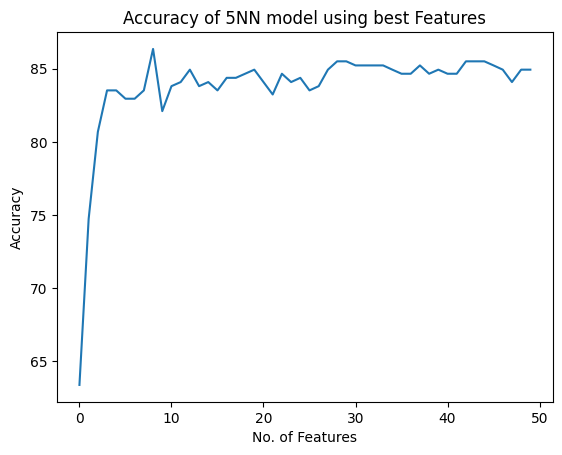

In [19]:
# Plot the accuracies
plt.plot(P_list)
plt.xlabel('No. of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of 5NN model using best Features')
plt.show();

### We can see tha using more thhe 10 features has no significant increment in accuracy thus from the next stages of the model development and deployments we use only up mfcc9

In [12]:
X_train = X_train[list(X_train.columns)[:10]]
X_test = X_test[list(X_test.columns)[:10]]

# Create KNN classifier to understand the baseline performance
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4188034188034188


In [13]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 7  0  0  1  0]
 [ 0  3  0  1  0]
 [ 0  0  2  1  6]
 [ 0  1  3 16  6]
 [ 0  0 27 22 21]]


<Axes: >

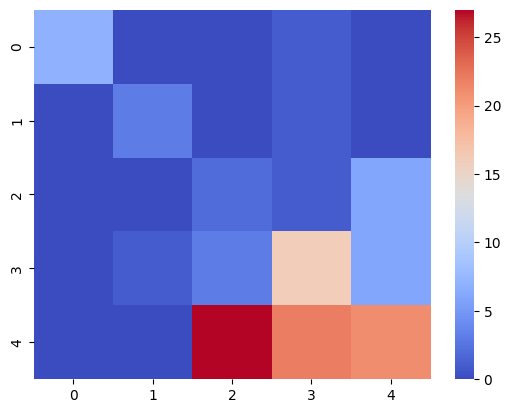

In [14]:
# heatmap of the confusion matrix
sns.heatmap(conf_matrix, cmap = "coolwarm")

In [15]:
# Using a mlp with 3 hidden layers has improved the accuracy 
mlp = MLPClassifier(hidden_layer_sizes=(100, 1000, 100),
                    activation='relu',  # Activation function
                    solver='adam',  # Optimization algorithm
                    max_iter=100,  # Maximum number of iterations for training
                    random_state=42)  # For reproducibility

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 1000, 100), max_iter=100,
              random_state=42)

Test Accuracy: 0.6324786324786325
Confusion Matrix:
[[ 7  0  0  1  0]
 [ 0  3  0  1  0]
 [ 0  0  1  1  7]
 [ 0  1  1 15  9]
 [ 0  0  9 13 48]]


<Axes: >

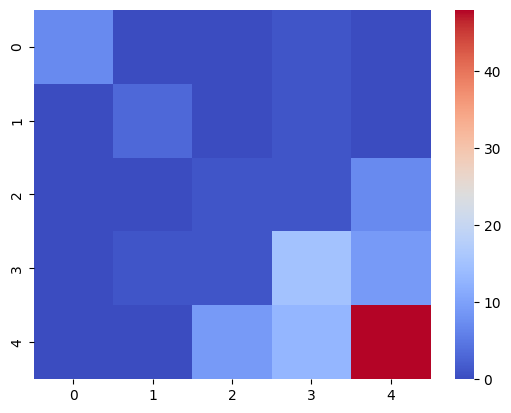

In [16]:
# Testing accuracy of the moodel
test_accuracy = mlp.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# confusion_matrix of the predictions
conf_matrix = confusion_matrix(y_test, mlp.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, cmap = "coolwarm")

Test Accuracy: 0.9259786476868327
Confusion Matrix:
[[281   0   0   0   0]
 [  0 281   0   0   0]
 [  0   0 254   2  25]
 [  0   5   4 244  28]
 [  0   8  13  19 241]]


<Axes: >

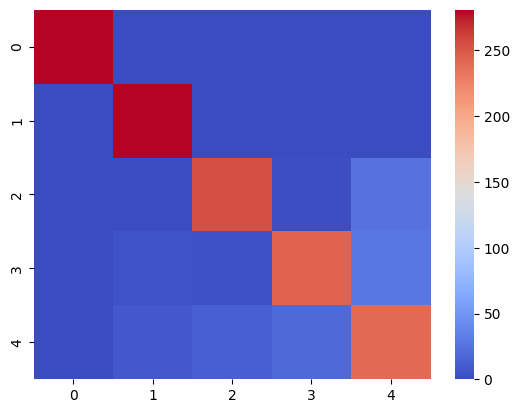

In [17]:
# Traing accuracy of the moodel
train_accuracy = mlp.score(X_train, y_train)
print(f'Test Accuracy: {train_accuracy}')

# confusion_matrix of the predictions
conf_matrix = confusion_matrix(y_train, mlp.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, cmap = "coolwarm")

In [18]:
joblib.dump(mlp, 'mlp.joblib')

['mlp.joblib']